**Outlier Detection :**

In [58]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install ycimpute

Note: you may need to restart the kernel to use updated packages.


In [67]:
import seaborn as sns
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno
from termcolor import colored
from sklearn import preprocessing 
from ycimpute.imputer import knnimput
from ycimpute.imputer import iterforest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder


In [2]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


Low Threshold :  51.5
High Threshold :  63.5




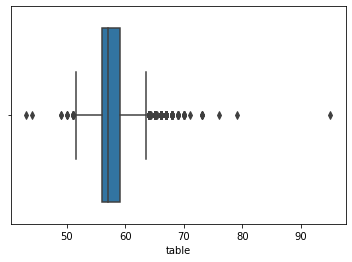

In [3]:
df_t = df["table"]
sns.boxplot(x=df_t); # dont forget to write "x = ....."

Q1 = df_t.quantile(0.25)
Q3 = df_t.quantile(0.75)
IQR = (Q3-Q1)*1.5
print(colored("\033[1m" +"Low Threshold : ", "blue"), Q1 - IQR)
print(colored("\033[1m" +"High Threshold : ", "blue"), Q3 + IQR)
print("\n")

In [4]:
print((df_t < Q1 - IQR) | (df_t > Q3 + IQR)) # true-false
print(df_t[(df_t < Q1 - IQR) | (df_t > Q3 + IQR)]) # values 
print(df_t[(df_t < Q1 - IQR) | (df_t > Q3 + IQR)].index)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool
2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64
Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)


In [5]:
outlier = (df_t < Q1 - IQR)
outlier

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [6]:
# Deleting :

type(df_t)  # pandas.core.series.Series
df_t = pd.DataFrame(df_t) 
type(df_t)  # pandas.core.frame.DataFrame
df_t.shape  # (53940, 1)
t_df = df_t[~((df_t < Q1 - IQR) | (df_t > Q3 + IQR)).any(axis = 1)]
t_df.shape  # (53335, 1)

(53335, 1)

In [7]:
# Filled with mean :

df_t = df["table"]
outlier.head() 
df_t[outlier]
df_t.mean()  # 57.45718390804603
df_t[outlier] = df_t.mean()
df_t[outlier]

C:\Users\AleynaCihangir\AppData\Local\Temp\ipykernel_27720\1556283050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t[outlier] = df_t.mean()


1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [8]:
# Supression : 

df_t = df["table"]
df_t[outlier]
df_t[outlier] = (df_t < Q1 - IQR)
df_t[outlier]

C:\Users\AleynaCihangir\AppData\Local\Temp\ipykernel_27720\517555124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t[outlier] = (df_t < Q1 - IQR)


1515     False
3238     False
3979     False
4150     False
5979     False
7418     False
8853     False
11368    False
22701    False
25179    False
26387    False
33586    False
35633    False
45798    False
46040    False
47630    False
Name: table, dtype: object

**MULTIPLE OUTLIER :** 

*Local Outlier Factor :*
The local density of a point is compared to its neighbors. If a point is significantly less dense than its neighbours, it can be interpreted as less frequent than its neighbours. Therefore, there is a neighborhood structure here. If the periphery of a value is not dense, it is considered an outlier.

In [9]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)    # LocalOutlierFactor(contamination=0.1)
clf.fit_predict(df)                                                # array([-1, -1, -1, ...,  1,  1,  1])
df_scores = clf.negative_outlier_factor_                           # array([-1.58352526, -1.59732899,  ..., -1.00809552, -1.00849038 ])
df_scores[0:10] 
np.sort(df_scores)[0:20]
threshold = np.sort(df_scores)[13]                                 # -3.823787967755565
outlier = df_scores > threshold                                    # array([ True,  True,  True, ...,  True,  True,  True])
new_df = df[df_scores > threshold]
new_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# Supression : 

sup_value = df[df_scores == threshold]
outliers = df[~outlier]
res = outliers.to_records(index = False)  # dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])
res[:] = sup_value.to_records(index = False)
res

rec.array([(0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8),
           (0.91, 61., False, 3546, 6.24, 6.21, 3.8)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', 'O'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [11]:
df[~outlier]

,carat,depth,table,price,x,y,z
1515,0.91,65.3,False,2996,6.05,5.98,3.93
3238,0.94,66.0,False,3353,6.13,6.17,4.06
3979,1.00,62.2,False,3511,6.47,6.40,4.00
4150,0.91,61.0,False,3546,6.24,6.21,3.80
5979,1.00,64.0,False,3951,6.43,6.39,4.10
7418,1.02,61.8,False,4227,6.59,6.51,4.05
8853,1.00,66.4,False,4480,6.31,6.22,4.16
11368,1.04,62.9,False,4997,6.45,6.41,4.04
22701,0.30,64.5,False,630,4.28,4.25,2.75
33586,0.37,62.7,False,833,4.65,4.57,2.89


In [12]:
df[~outlier] = pd.DataFrame(res, index = df[~outlier].index )
df[~outlier]

,carat,depth,table,price,x,y,z
1515,0.91,61.0,False,3546,6.24,6.21,3.8
3238,0.91,61.0,False,3546,6.24,6.21,3.8
3979,0.91,61.0,False,3546,6.24,6.21,3.8
4150,0.91,61.0,False,3546,6.24,6.21,3.8
5979,0.91,61.0,False,3546,6.24,6.21,3.8
7418,0.91,61.0,False,3546,6.24,6.21,3.8
8853,0.91,61.0,False,3546,6.24,6.21,3.8
11368,0.91,61.0,False,3546,6.24,6.21,3.8
22701,0.91,61.0,False,3546,6.24,6.21,3.8
33586,0.91,61.0,False,3546,6.24,6.21,3.8


**NaN- Value :**

In [13]:
# NaN values 
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
print(colored("\033[1m" +"Sum of NaN values : ", "blue"),"\n", df.isnull().sum())
print(colored("\033[1m" +"Sum of not NaN values : ", "blue"),"\n", df.notnull().sum(), "\n")
print(colored("\033[1m" +"Total NaN values : ", "blue"), df.isnull().sum().sum())
print(colored("\033[1m" +"Is that NaN or not? : ", "blue"),"\n", df.isnull())

Sum of NaN values :  
 V1    2
V2    3
V3    2
dtype: int64
Sum of not NaN values :  
 V1    7
V2    6
V3    7
dtype: int64 

Total NaN values :  7
Is that NaN or not? :  
       V1     V2     V3
0  False  False   True
1  False   True  False
2  False  False  False
3   True  False  False
4  False  False  False
5  False   True  False
6   True   True   True
7  False  False  False
8  False  False  False


**df.dropna(insert = True) : is meaning 'permanently delete'**

In [15]:
print(colored("\033[1m" +"Any column has NaN value : ", "blue"),"\n", df[df.isnull().any(axis=1)])
print(colored("\033[1m" +"A column has NaN in every row : ", "blue"),"\n", df[df.isnull().all(axis=1)])
print(colored("\033[1m" +"Any column has not NaN value : ", "blue"),"\n", df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()])
print(colored("\033[1m" +"Delete NaN value directly : ", "blue"),"\n", df.dropna())

Any column has NaN value :  
     V1   V2    V3
0  1.0  7.0   NaN
1  3.0  NaN  12.0
3  NaN  8.0   6.0
5  1.0  NaN   7.0
6  NaN  NaN   NaN
A column has NaN in every row :  
    V1  V2  V3
6 NaN NaN NaN
Any column has not NaN value :  
      V1    V2    V3
2   6.0   5.0   5.0
4   7.0  12.0  14.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0
Delete NaN value directly :  
      V1    V2    V3
2   6.0   5.0   5.0
4   7.0  12.0  14.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0


In [16]:
print(colored("\033[1m" +"Mean of V1: ", "blue"), df["V1"].mean())
print(colored("\033[1m" +"Fill NaN values with mean of V1: ", "blue"), "\n" , df["V1"].fillna(df["V1"].mean())) # or 
print(colored("\033[1m" +"Fill NaN values with mean of each columns: ", "blue"),"\n", df.apply(lambda x : x.fillna(x.mean()), axis =0 ))

Mean of V1:  6.0
Fill NaN values with mean of V1:  
 0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64
Fill NaN values with mean of each columns:  
      V1         V2    V3
0   1.0   7.000000  11.0
1   3.0   6.166667  12.0
2   6.0   5.000000   5.0
3   6.0   8.000000   6.0
4   7.0  12.000000  14.0
5   1.0   6.166667   7.0
6   6.0   6.166667  11.0
7   9.0   2.000000   2.0
8  15.0   3.000000  31.0


In [17]:
# SEABORN : 
df1 = sns.load_dataset('planets')
df1.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<AxesSubplot:>

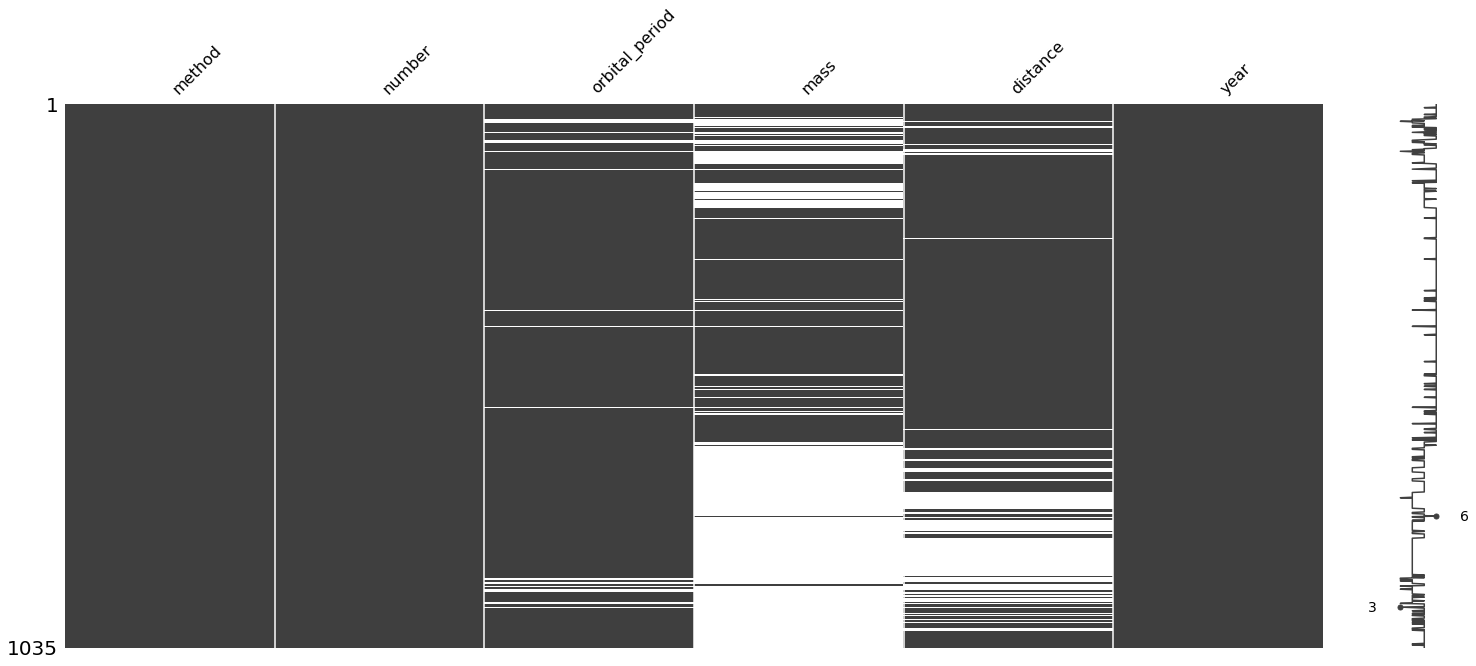

In [18]:
msno.matrix(df1)

**Value Assignment Tech.(Numerical) :**

In [19]:
# First way with lambda function 
print(colored("\033[1m" +"Fill NaN values using lambda : ", "blue"),"\n", df.apply(lambda x : x.fillna(x.mean()), axis =0 ))

# Second way  with fillna() function  
print(colored("\033[1m" +"Fill NaN values using fillna(): ", "blue"),"\n", df.fillna(df.mean()[:]))

#Third way with where() function 
print(colored("\033[1m" +"Fill NaN values using where() : ", "blue"),"\n", df.where(pd.notna(df),df.mean(), axis="columns"))

Fill NaN values using lambda :  
      V1         V2    V3
0   1.0   7.000000  11.0
1   3.0   6.166667  12.0
2   6.0   5.000000   5.0
3   6.0   8.000000   6.0
4   7.0  12.000000  14.0
5   1.0   6.166667   7.0
6   6.0   6.166667  11.0
7   9.0   2.000000   2.0
8  15.0   3.000000  31.0
Fill NaN values using fillna():  
      V1         V2    V3
0   1.0   7.000000  11.0
1   3.0   6.166667  12.0
2   6.0   5.000000   5.0
3   6.0   8.000000   6.0
4   7.0  12.000000  14.0
5   1.0   6.166667   7.0
6   6.0   6.166667  11.0
7   9.0   2.000000   2.0
8  15.0   3.000000  31.0
Fill NaN values using where() :  
      V1         V2    V3
0   1.0   7.000000  11.0
1   3.0   6.166667  12.0
2   6.0   5.000000   5.0
3   6.0   8.000000   6.0
4   7.0  12.000000  14.0
5   1.0   6.166667   7.0
6   6.0   6.166667  11.0
7   9.0   2.000000   2.0
8  15.0   3.000000  31.0


**Value Assignment Tech.(Categorical) :**

In [20]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df_c = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4})

In [21]:
df_c

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


departman
IK    AxesSubplot(0.125,0.125;0.775x0.755)
IT    AxesSubplot(0.125,0.125;0.775x0.755)
Name: maas, dtype: object

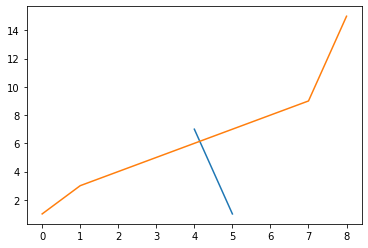

In [23]:
 df_c.groupby('departman')['maas'].plot()

In [24]:
 df_c['maas'].fillna(df_c.groupby('departman')['maas'].transform('mean'))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [27]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
    {'maas': V1,
     'departman' :V4})
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [30]:
df['departman'].fillna(df['departman'].mode()[0], inplace = False)

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [31]:
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [39]:
var_names = list(df)
n_df = np.array(df)
print(n_df[0:10], '\n')
print(colored("\033[1m" +"Shape : ", "blue"), n_df.shape)

[[ 0.      3.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]
 [ 1.      3.     26.      0.      0.      7.925 ]
 [ 1.      1.     35.      1.      0.     53.1   ]
 [ 0.      3.     35.      0.      0.      8.05  ]
 [ 0.      3.         nan  0.      0.      8.4583]
 [ 0.      1.     54.      0.      0.     51.8625]
 [ 0.      3.      2.      3.      1.     21.075 ]
 [ 1.      3.     27.      0.      2.     11.1333]
 [ 1.      2.     14.      1.      0.     30.0708]] 

Shape :  (891, 6)


In [44]:
dff = knnimput.KNN(k = 4).complete(n_df)
print( '\n')
print(colored("\033[1m" +"Type : ", "blue"), type(dff))

Imputing row 1/891 with 0 missing, elapsed time: 0.091
Imputing row 101/891 with 0 missing, elapsed time: 0.093
Imputing row 201/891 with 0 missing, elapsed time: 0.094
Imputing row 301/891 with 1 missing, elapsed time: 0.095
Imputing row 401/891 with 0 missing, elapsed time: 0.096
Imputing row 501/891 with 0 missing, elapsed time: 0.098
Imputing row 601/891 with 0 missing, elapsed time: 0.098
Imputing row 701/891 with 0 missing, elapsed time: 0.099
Imputing row 801/891 with 0 missing, elapsed time: 0.100


Type :  <class 'numpy.ndarray'>


In [46]:
dff = pd.DataFrame(dff, columns = var_names)
print(colored("\033[1m" +"Type : ", "blue"), type(dff))

Type :  <class 'pandas.core.frame.DataFrame'>


In [47]:
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [51]:
var_names = list(df)
n_df = np.array(df)
# dff = iterforest.IterImput().complete(n_df) 
# the lib has a lot of error value. 

**Data Standar.**

In [52]:
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [55]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

**Normalizarion :**

In [59]:
preprocessing.normalize(df) # 1 to 0 

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [64]:
# Min-Max  :
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [65]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [66]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
lbe = LabelEncoder()
lbe.fit_transform(df['sex'])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [71]:
df['new_sex'] = lbe.fit_transform(df['sex'])
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [74]:
df["day"].str.contains("Sun").head()

0    True
1    True
2    True
3    True
4    True
Name: day, dtype: bool

In [80]:
df["new_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)
df

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [78]:
lbe = LabelEncoder()
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

**ONE HOT ENCODING :**

In [81]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [82]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [83]:
df_one_hot.head()
# dummy 

,total_bill,tip,smoker,day,time,size,new_sex,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [84]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
